In [309]:
from IPython.display import display
display({'text/html': '<h1>Topic1 Assignment - Part2</h1>', 'text/plain': 'Topic1 Assignment'}, raw=True)
display({'text/html': '<h1>Anoop Korappath</h1>', 'text/plain': 'Anoop Korappath'}, raw=True)
display({'text/html': '<h1>10/31/2021</h1>', 'text/plain': '10/31/2021'}, raw=True)

Topic1 Assignment

Anoop Korappath

10/31/2021

## Read Dataset

In [310]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
df_main = pd.DataFrame(pd.read_csv("Housing.csv"))
df_main.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Cleaning

price        0.0
area         0.0
bedrooms     0.0
bathrooms    0.0
dtype: float64


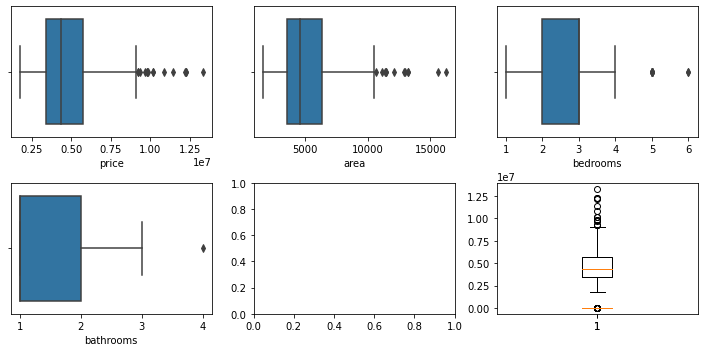

In [312]:
# Remove all columns except the price,area,bedrooms and bathrooms.

df_main = df_main[['price','area','bedrooms','bathrooms']]
# Check for null values
print(df_main.isnull().sum()*100/df_main.shape[0])

#Check outliers.
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df_main['price'], ax = axs[0,0])
plt2 = sns.boxplot(df_main['area'], ax = axs[0,1])
plt3 = sns.boxplot(df_main['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df_main['bathrooms'], ax = axs[1,0])
plt.tight_layout()

#Drop the price and area rows that are outliers
plt.boxplot(df_main.price)
Q1 = df_main.price.quantile(0.25)
Q3 = df_main.price.quantile(0.75)
IQR = Q3 - Q1
df_main = df_main[(df_main.price >= Q1 - 1.5*IQR) & (df_main.price <= Q3 + 1.5*IQR)]

plt.boxplot(df_main.area)
Q1 = df_main.area.quantile(0.25)
Q3 = df_main.area.quantile(0.75)
IQR = Q3 - Q1
df_main = df_main[(df_main.area >= Q1 - 1.5*IQR) & (df_main.area <= Q3 + 1.5*IQR)]

In [313]:
from tabulate import tabulate

print(tabulate(df_main.head(), headers='keys', tablefmt='psql'))

+----+-----------+--------+------------+-------------+
|    |     price |   area |   bedrooms |   bathrooms |
|----+-----------+--------+------------+-------------|
| 15 | 9.1e+06   |   6000 |          4 |           1 |
| 16 | 9.1e+06   |   6600 |          4 |           2 |
| 17 | 8.96e+06  |   8500 |          3 |           2 |
| 18 | 8.89e+06  |   4600 |          3 |           2 |
| 19 | 8.855e+06 |   6420 |          3 |           2 |
+----+-----------+--------+------------+-------------+


## Train Test split and Scaling

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
df_train, df_test = train_test_split(df_main, train_size = 0.75, test_size = 0.25, random_state = 100)
scaler = MinMaxScaler()
df_train[['area', 'bedrooms', 'bathrooms','price']] = scaler.fit_transform(df_train[['area', 'bedrooms', 'bathrooms', 'price']])

## Correlation plot

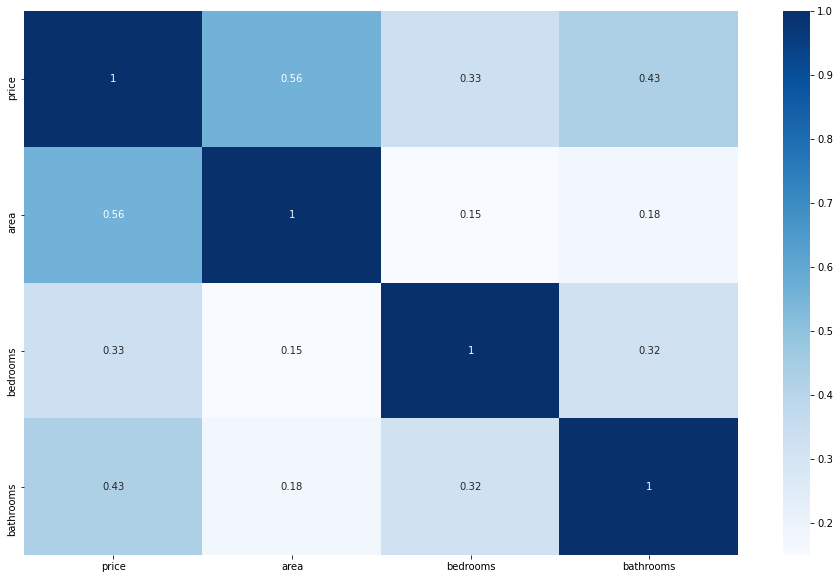

In [315]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), cmap="Blues", annot=True)
plt.show()

# We can see that the price and area is highly correlated

## Model Building

In [316]:
import statsmodels.api as sm

y_train = df_train.pop('price')
X_train = df_train
#Add a constant
X_train = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

# We can see from the p-values that are the variables are significant for prediction. So we cannot remove any of the variables.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.11e-49
Time:                        10:41:02   Log-Likelihood:                 166.23
No. Observations:                 387   AIC:                            -324.5
Df Residuals:                     383   BIC:                            -308.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0804      0.025      3.196      0.0

## Error Plots

Text(0.5, 0, 'Errors')

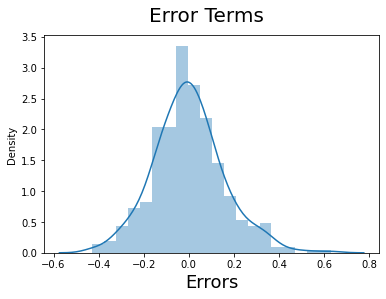

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_price = lm.predict(X_train)
res = (y_train_price - y_train)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

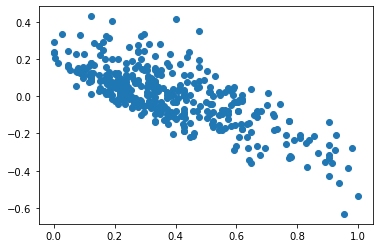

In [318]:
plt.scatter(y_train,res)
plt.show()

## Model Evaluation

In [319]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

df_test[['area','bedrooms', 'bathrooms','price']] = scaler.fit_transform(df_test[['area','bedrooms', 'bathrooms', 'price']])
y_test = df_test.pop('price')
X_test = df_test
X_test = sm.add_constant(X_test)
y_pred = lm.predict(X_test)
print ("Coefficient of determination :",r2_score(y_test,y_pred))
print ("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))


Coefficient of determination : 0.4493044892819218
MSE:  0.02931323318434229
RMSE:  0.17121107786689005


Text(0, 0.5, 'y_pred')

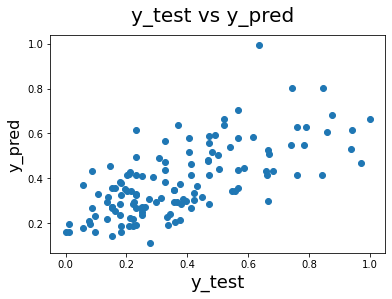

In [320]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)


## Finding accuracy mathematically

In [321]:
import numpy as np
y_test = pd.to_numeric(y_test, errors='coerce')
RSS = np.sum((y_pred - y_test)**2)
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean)**2)
R2 = 1 - RSS/TSS
print("R2 is ", R2)
print("\n")
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print("Adjusted Rsquared is ", adj_rsquared)

R2 is  0.4493044892819218


Adjusted Rsquared is  0.4361926914076819


## Equation for the best fitted line

### The equation for the best fitted line can be given as

####   price =  0.49 * area + 0.23 * bedrooms + 0.27 * bathrooms
